# DAY0 - Looking for Dataset + Problem 

In [1]:
# needed to make web requests
import requests

#store the data we get as a dataframe
import pandas as pd

#convert the response as a structured json
import json

#mathematical operations on lists
import numpy as np

#parse the datetimes we get from NOAA
from datetime import datetime



In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
from sklearn.metrics import accuracy_score

In [ ]:
#add the access token you got from NOAA
Token = 'xKIlBHakeOEdyBfhPkKcDKyLzjofRpNY'

#MIAMI INTERNATIONAL AIRPORT, FL US station
station_id = 'GHCND:USW00012839'

# https://www.ncdc.noaa.gov/cdo-web/datatools/findstation

In [3]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

#for each year from 2015-2019 ...
for year in range(2015, 2020):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019


In [4]:
#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

In [10]:
df_temp['date'].head()

0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: date, dtype: datetime64[ns]

In [11]:
df_temp['avgTemp'].head()

0    46.58
1    48.02
2    49.82
3    52.16
4    58.64
Name: avgTemp, dtype: float64

# DAY1 - Brainstorming & Data Preparation

    Idea generation & planning
    Data gathering & cleaning
    Data storage

# Let's start with the Solar Dataset


In [80]:
import pandas as pd

solar = pd.read_csv('/Users/gracemartinez/Downloads/solar.csv')
solar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [81]:
solar.shape

(11898, 15)

In [82]:
solar.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Time', 'Delta T (s)',
       'Lunation Number', 'Saros Number', 'Eclipse Type', 'Gamma',
       'Eclipse Magnitude', 'Latitude', 'Longitude', 'Sun Altitude',
       'Sun Azimuth', 'Path Width (km)', 'Central Duration'],
      dtype='object')

In [83]:
solar.columns = solar.columns.str.replace(' ','_')
solar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type', 'Gamma',
       'Eclipse_Magnitude', 'Latitude', 'Longitude', 'Sun_Altitude',
       'Sun_Azimuth', 'Path_Width_(km)', 'Central_Duration'],
      dtype='object')

In [84]:
#make a dataframe describing columns meanings

# Import pandas library 
import pandas as pd 
  
# initialize list of lists 
column_data = [['Catalog Number', 'Sequential number of the eclipse in the catalog links to the map published in the Five Millennium Canon of Solar Eclipses: -1999 to +3000.'], ['Calendar Date', 'Calendar Date at instant of Greatest Eclipse. Gregorian Calendar is used for dates after 1582 Oct 15. Julian Calendar is used for dates before 1582 Oct 04.'], 
               ['Eclipse Time', 'Duration of Time'], 
               ['Delta T (\s)\', \'the arithmetic difference between Dynamical Time and Universal Time. It is a measure of the accumulated clock error due to the variable rotation period of Earth.'], 
               ['Lunation Number', 'the number of synodic months since New Moon of 2000 Jan 06. The Brown Lunation Number can be determined by adding 953.'], ['Saros Number', 'Saros series number of eclipse. Each eclipse in a Saros is separated by an interval of 18 years 11.3 days.'], 
               ['Eclipse Type', 'Eclipse Type where: P  = Partial Eclipse. A  = Annular Eclipse. T  = Total Eclipse. H  = Hybrid or Annular/Total Eclipse. Second character in Eclipse Type: "m" = Middle eclipse of Saros series. "n" = Central eclipse with no northern limit. "s" = Central eclipse with no southern limit. "+" = Non-central eclipse with no northern limit. "-" = Non-central eclipse with no southern limit. "2" = Hybrid path begins total and ends annular. "3" = Hybrid path begins annular and ends total. "b" = Saros series begins (\first eclipse in series)\. "e" = Saros series ends (\last eclipse in series)\.'],
                ['Gamma', 'Distance of the shadow cone axis from the center of Earth (\units of equatorial radii)\ at the instant of greatest eclipse.'],
                ['Eclipse Magnitude', 'the fraction of the Sun\'s diameter obscured by the Moon. For annular, total and hybrid eclipses, this value is actually the diameter ratio of Moon/Sun.'], 
                ['Latitude', 'Latitude where greatest eclipse is seen.'], ['Longitude', 'Longitude where greatest eclipse is seen.'], ['Sun Altitude', 'Sun\'s altitude at greatest eclipse.']
                ['Sun Azimuth', 'Sun\'s azimuth at greatest eclipse.'], ['Path Width (\km)\', 'Width of the path of totality or annularity at greatest eclipse (\kilometers)\.'], ['Central Duration', 'Central Line Duration of total or annular phase at greatest eclipse.']]

  
# Create the pandas DataFrame 
solar_df = pd.DataFrame(column_data, columns = ['Column_Name', 'Description']) 
  
# print dataframe. 
solar_df 

SyntaxError: invalid syntax (<ipython-input-84-a4979ca7886a>, line 15)

In [85]:
solar.dtypes

Catalog_Number         int64
Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)            int64
Lunation_Number        int64
Saros_Number           int64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Latitude              object
Longitude             object
Sun_Altitude           int64
Sun_Azimuth            int64
Path_Width_(km)       object
Central_Duration      object
dtype: object

In [ ]:
# need to know what each column means/represents to know if they're a correct type

In [ ]:
'''
- Need to change:

Calendar_Date         object -> (-)Y/M/D, ex. -1997 May 22
Eclipse_Time          object -> Date

- will drop for python, have again for tableau:

Latitude              object, separate into 2 columns: decimal# & Letter
Longitude             object, separate into 2 columns: decimal# & Letter

- i dont think i need them:     need to see the correlation with the Y

Path_Width_(km)       object    1/3 of null values. 
Central_Duration      object    1/3 of null values. 

In [86]:
solar['Eclipse_Type'].value_counts()

P     3875
A     3755
T     3049
H      502
Pb     163
Pe     162
Am      72
Tm      72
An      36
A-      34
A+      34
H3      26
As      25
H2      24
T-      17
Hm      17
Tn      14
Ts      12
T+       9
Name: Eclipse_Type, dtype: int64

In [32]:
# we will data clean by putting all common categories together 

In [87]:
# only 4 types of lunar eclipse: P, A, T, H 

def eclipseClean(x):
    if 'P' in x:
        return('P')
    if 'A' in x:
        return('A')
    if 'T' in x:
        return('T')
    if 'H' in x:
        return('H')
    
    

In [88]:
solar['Eclipse_Type'] = list(map(eclipseClean,solar['Eclipse_Type']))
solar['Eclipse_Type'].value_counts()

P    4200
A    3956
T    3173
H     569
Name: Eclipse_Type, dtype: int64

In [89]:
len(solar['Eclipse_Type'].value_counts())

4

In [ ]:
# so now we have the 4 main categories of 'Eclipse Type', 
# but we can drop 'H' column because it's "Hybrid or Annular/Total Eclipse."
# and we're only dealing with Partial, Annular, or Total Eclipses.

In [90]:
solar = solar.drop(solar[solar.Eclipse_Type == 'H'].index)

In [91]:
solar['Eclipse_Type'].value_counts()

P    4200
A    3956
T    3173
Name: Eclipse_Type, dtype: int64

In [ ]:
# now let's look at the Latitude & Longitude columns

In [92]:
solar.Latitude.head()

0     6.0N
1    32.9S
2    46.2N
3    67.8S
4    60.6S
Name: Latitude, dtype: object

In [93]:
# Using regex to separate Latitude & Longitude columns

import re

solar['Latitude_Number'] = solar['Latitude'].str.replace('([A-Z]+)', '')
solar['Latitude_Letter'] = solar['Latitude'].str.extract('([A-Z]+)')
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,6.0,N
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,32.9,S
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,46.2,N
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,67.8,S
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,60.6,S


In [94]:
# Same with Logitude

solar['Longitude_Number'] = solar['Longitude'].str.replace('([A-Z]+)', '')
solar['Longitude_Letter'] = solar['Longitude'].str.extract('([A-Z]+)')
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Latitude,Longitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s,6.0,N,33.3,W
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s,32.9,S,10.8,E
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s,46.2,N,83.4,E
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s,67.8,S,143.8,W
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN,60.6,S,106.4,W


In [95]:
# Dropping original Latitude & Longitude columns 

solar.drop(columns =["Latitude", "Longitude"], inplace = True) 
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,247,06m37s,6.0,N,33.3,W
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,236,06m44s,32.9,S,10.8,E
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,111,02m15s,46.2,N,83.4,E
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,162,01m14s,67.8,S,143.8,W
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,NaN,NaN,60.6,S,106.4,W


In [96]:
solar.isnull().sum()

Catalog_Number          0
Calendar_Date           0
Eclipse_Time            0
Delta_T_(s)             0
Lunation_Number         0
Saros_Number            0
Eclipse_Type            0
Gamma                   0
Eclipse_Magnitude       0
Sun_Altitude            0
Sun_Azimuth             0
Path_Width_(km)      4200
Central_Duration     4200
Latitude_Number         0
Latitude_Letter         0
Longitude_Number        0
Longitude_Letter        0
dtype: int64

In [97]:
# how much correlation do the columns with Null have

solar.isnull().sum() / solar.shape[0]

Catalog_Number       0.00000
Calendar_Date        0.00000
Eclipse_Time         0.00000
Delta_T_(s)          0.00000
Lunation_Number      0.00000
Saros_Number         0.00000
Eclipse_Type         0.00000
Gamma                0.00000
Eclipse_Magnitude    0.00000
Sun_Altitude         0.00000
Sun_Azimuth          0.00000
Path_Width_(km)      0.37073
Central_Duration     0.37073
Latitude_Number      0.00000
Latitude_Letter      0.00000
Longitude_Number     0.00000
Longitude_Letter     0.00000
dtype: float64

In [98]:
# Need to drop 2 columns with high missing null values

solar = solar.drop(["Path_Width_(km)", "Central_Duration"], axis=1)

In [99]:
# Also drop 'Catalog_Number' column since it is just like the index, hence unnecessary

solar = solar.drop(["Catalog_Number"], axis=1)

In [100]:
solar.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W


In [101]:
len(solar.columns)

14

In [102]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals

,Calendar_Date,Eclipse_Time,Eclipse_Type,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,-1999 June 12,03:14:51,T,6.0,N,33.3,W
1,-1999 December 5,23:45:23,A,32.9,S,10.8,E
2,-1998 June 1,18:09:16,T,46.2,N,83.4,E
3,-1998 November 25,05:57:03,A,67.8,S,143.8,W
4,-1997 April 22,13:19:56,P,60.6,S,106.4,W
...,...,...,...,...,...,...,...
11892,2998 June 15,14:49:27,P,66.5,S,32.5,W
11893,2998 December 10,03:18:31,P,67.2,N,145.0,E
11894,2999 May 6,23:23:57,T,71.5,N,177.3,E
11895,2999 October 30,09:34:33,A,70.9,S,84.7,W


In [ ]:
# Need to convert Latitude_Number & Longitude_Number to float64 type

In [103]:
solar["Latitude_Number"] = pd.to_numeric(solar["Latitude_Number"])
solar.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W


In [104]:
solar["Longitude_Number"] = pd.to_numeric(solar["Longitude_Number"])
solar.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
0,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344,6.0,N,33.3,W
1,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21,32.9,S,10.8,E
2,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151,46.2,N,83.4,E
3,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74,67.8,S,143.8,W
4,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281,60.6,S,106.4,W


In [105]:
# Saving for future Tableau usage

solar.to_csv('Solar_tableau')

In [106]:
solar.dtypes

Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)            int64
Lunation_Number        int64
Saros_Number           int64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Sun_Altitude           int64
Sun_Azimuth            int64
Latitude_Number      float64
Latitude_Letter       object
Longitude_Number     float64
Longitude_Letter      object
dtype: object

In [107]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals.head()

,Calendar_Date,Eclipse_Time,Eclipse_Type,Latitude_Letter,Longitude_Letter
0,-1999 June 12,03:14:51,T,N,W
1,-1999 December 5,23:45:23,A,S,E
2,-1998 June 1,18:09:16,T,N,E
3,-1998 November 25,05:57:03,A,S,W
4,-1997 April 22,13:19:56,P,S,W


In [108]:
len(SolarCategoricals.columns)

5

In [109]:
# Total columns

len(solar.dtypes)

14

In [110]:
solar = solar.drop(['Latitude_Number', 'Longitude_Number', 'Latitude_Letter', 'Longitude_Letter', 'Eclipse_Time'], axis=1)

In [111]:
SolarNumericals = solar._get_numeric_data()
SolarNumericals

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,46438,-49456,5,-0.2701,1.0733,74,344
1,46426,-49450,10,-0.2317,0.9382,76,21
2,46415,-49444,15,0.4994,1.0284,60,151
3,46403,-49438,20,-0.9045,0.9806,25,74
4,46393,-49433,-13,-1.4670,0.1611,0,281
...,...,...,...,...,...,...,...
11892,4410,12349,182,-1.0158,0.9792,0,9
11893,4414,12355,187,1.2838,0.4773,0,179
11894,4417,12360,154,0.8388,1.0566,33,146
11895,4420,12366,159,-1.0023,0.9586,0,137


In [112]:
# use corr function, will untilize number of numerical columns 

S_corr_matrix = SolarNumericals.corr()
S_corr_matrix.head()

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
Delta_T_(s),1.000000,-0.895389,-0.859854,-0.001714,-0.017312,-0.006321,0.001028
Lunation_Number,-0.895389,1.000000,0.964364,-0.000305,0.007834,0.006855,0.000447
Saros_Number,-0.859854,0.964364,1.000000,-0.001338,0.006829,0.006747,-0.039708
Gamma,-0.001714,-0.000305,-0.001338,1.000000,0.004195,0.001739,-0.004446
Eclipse_Magnitude,-0.017312,0.007834,0.006829,0.004195,1.000000,0.690416,0.003867


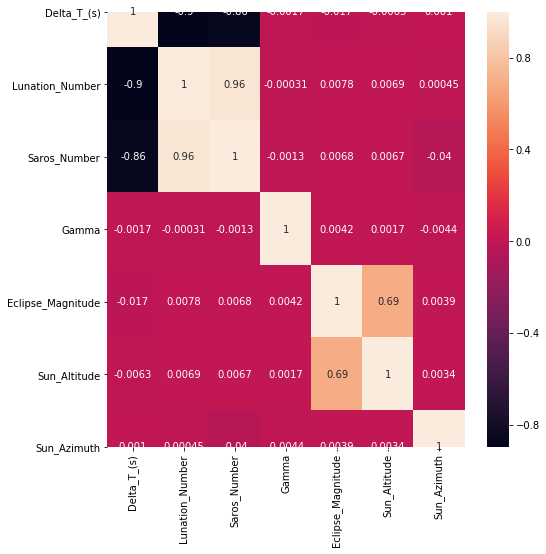

In [113]:
# set fig size to have better readibility of heatmap

fig, ax = plt.subplots(figsize=(8,8))
S_heatmap = sns.heatmap(S_corr_matrix, annot =True, ax=ax)
S_heatmap

In [114]:
# Due to high correlation, we are dropping 'Saros_Number' & 'Lunation_Number'

solar = solar.drop(['Saros_Number', 'Lunation_Number'], axis=1)


In [115]:
# update 

SolarNumericals = solar._get_numeric_data()
SolarNumericals

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,46438,-0.2701,1.0733,74,344
1,46426,-0.2317,0.9382,76,21
2,46415,0.4994,1.0284,60,151
3,46403,-0.9045,0.9806,25,74
4,46393,-1.4670,0.1611,0,281
...,...,...,...,...,...
11892,4410,-1.0158,0.9792,0,9
11893,4414,1.2838,0.4773,0,179
11894,4417,0.8388,1.0566,33,146
11895,4420,-1.0023,0.9586,0,137


In [116]:
S_corr_matrix = SolarNumericals.corr()
S_corr_matrix.head()

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
Delta_T_(s),1.000000,-0.001714,-0.017312,-0.006321,0.001028
Gamma,-0.001714,1.000000,0.004195,0.001739,-0.004446
Eclipse_Magnitude,-0.017312,0.004195,1.000000,0.690416,0.003867
Sun_Altitude,-0.006321,0.001739,0.690416,1.000000,0.003370
Sun_Azimuth,0.001028,-0.004446,0.003867,0.003370,1.000000


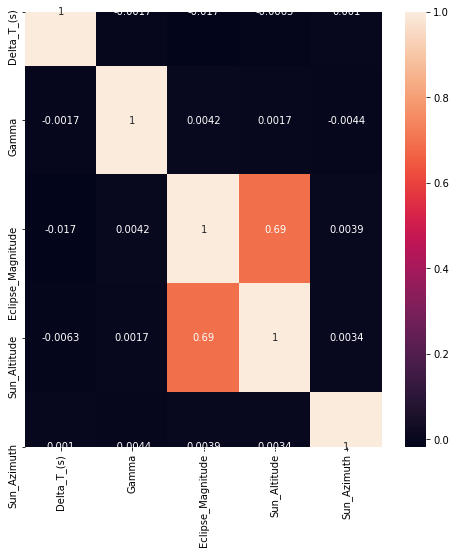

In [117]:
fig, ax = plt.subplots(figsize=(8,8))
S_heatmap = sns.heatmap(S_corr_matrix, annot =True, ax=ax)
S_heatmap

([0, 1, 2], <a list of 3 Text xticklabel objects>)

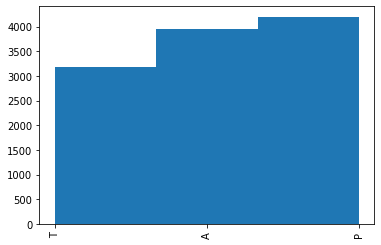

In [118]:
plt.hist(solar["Eclipse_Type"], bins = len(solar["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [119]:
# normalize numerical values

import pandas as pd
from sklearn import preprocessing

x = SolarNumericals.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [120]:
df.head()

,0,1,2,3,4
0,1.000000,0.413715,0.992601,0.822222,0.955556
1,0.999742,0.425946,0.867659,0.844444,0.058333
2,0.999505,0.658810,0.951077,0.666667,0.419444
3,0.999246,0.211651,0.906871,0.277778,0.205556
4,0.999031,0.032488,0.148987,0.000000,0.780556


In [121]:
# make new column with no negative symbol

def c0(x):
    if '-' in x:
        x = x.replace('-','')
    return x

In [122]:
solar['Calendar_Date_Clean'] = list(map(c0, solar['Calendar_Date']))
solar.head()

,Calendar_Date,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean
0,-1999 June 12,46438,T,-0.2701,1.0733,74,344,1999 June 12
1,-1999 December 5,46426,A,-0.2317,0.9382,76,21,1999 December 5
2,-1998 June 1,46415,T,0.4994,1.0284,60,151,1998 June 1
3,-1998 November 25,46403,A,-0.9045,0.9806,25,74,1998 November 25
4,-1997 April 22,46393,P,-1.4670,0.1611,0,281,1997 April 22


In [123]:
# Look for months only

import re 
re.findall('[A-z]+' , solar['Calendar_Date_Clean'][0])

['June']

In [124]:
# too much time trying to convert to correct datetime format, 
# used simple regex to remove negative symbol and extracted month


def c1(x):
    if '-' in x:
        x = x.replace('-','')
    return((re.findall('[A-z]+', x))[0])

In [125]:
solar['Calendar_Date_Month'] = list(map(c1, solar['Calendar_Date']))
solar['Calendar_Date_Month']

0            June
1        December
2            June
3        November
4           April
           ...   
11892        June
11893    December
11894         May
11895     October
11896       April
Name: Calendar_Date_Month, Length: 11329, dtype: object

In [126]:
# Look for years only

def c2(x):
    if '-' in x:
        x = x.replace('-','')
    temp = re.findall('\d\d\d\d', x)
    if len(temp)>0:
        return temp[0]
    else:
        return temp

In [127]:
solar['Calendar_Date_Year'] = list(map(c2, solar['Calendar_Date']))
solar.head()

,Calendar_Date,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,-1999 June 12,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999
1,-1999 December 5,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999
2,-1998 June 1,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998
3,-1998 November 25,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998
4,-1997 April 22,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997


In [128]:
# drop original column

solar = solar.drop(["Calendar_Date"], axis=1)

In [129]:
solar.head()

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999
1,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999
2,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998
3,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998
4,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997


In [130]:
# Now let's play with the categories!

In [131]:
solar.dtypes

Delta_T_(s)              int64
Eclipse_Type            object
Gamma                  float64
Eclipse_Magnitude      float64
Sun_Altitude             int64
Sun_Azimuth              int64
Calendar_Date_Clean     object
Calendar_Date_Month     object
Calendar_Date_Year      object
dtype: object

In [132]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals.head()

,Eclipse_Type,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,T,1999 June 12,June,1999
1,A,1999 December 5,December,1999
2,T,1998 June 1,June,1998
3,A,1998 November 25,November,1998
4,P,1997 April 22,April,1997


In [133]:
from sklearn import preprocessing



In [134]:
solar.head()

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year
0,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999
1,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999
2,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998
3,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998
4,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997


In [135]:
solar.columns

Index(['Delta_T_(s)', 'Eclipse_Type', 'Gamma', 'Eclipse_Magnitude',
       'Sun_Altitude', 'Sun_Azimuth', 'Calendar_Date_Clean',
       'Calendar_Date_Month', 'Calendar_Date_Year'],
      dtype='object')

In [ ]:
'''
The Target[Y] is finding the Eclipse_Type
The Features[X] are what will determine the best outcome for Y
need to determine which are the best features to use to get the prediction 
while having a high measurement of acuracy.

We will do a Train/Test Split in order to verify.
'''

In [ ]:
# presentation: explain what is under & overfitting a model stressing we dont want either in data analysis

aka (https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
we don't want this ' because they affect the predictability of our model '
but we also want it so it can generalize predictions with other data

overfitting- too complex/not AS generalized- will be VERY accurate on the training data, 
             ie. too many features or variables compared to the number of observations
             in this case the model learns & describes the 'noise' in the training data instead of focusing
             on the actual relationships between the variables in the training data.
        
underfitting- less prevalent than overfitting. misses the trends in the training data. due to too simple of a model, 
              not enough predictors or independent variables. also happens when fitting a linear model to data 
              that is nonlinear (such as using linear regression).
        
Best practice is to avoid both.
Train/Test split & Cross Validation help avoid overfitting more than undefitting.

    "The training set contains a known output and the model learns on this data 
    in order to be generalized to other data later on. We have the test dataset 
    (or subset) in order to test our model’s prediction on this subset."
    
    "Split the data into a training and test set
    This allows for use to train our model on the training set and evaluate the 
    built model against the test set to identify errors."

In [139]:
solar 

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Calendar_Date_Clean,Calendar_Date_Month,Calendar_Date_Year,Eclipse_Type_Encoded
0,46438,T,-0.2701,1.0733,74,344,1999 June 12,June,1999,2
1,46426,A,-0.2317,0.9382,76,21,1999 December 5,December,1999,0
2,46415,T,0.4994,1.0284,60,151,1998 June 1,June,1998,2
3,46403,A,-0.9045,0.9806,25,74,1998 November 25,November,1998,0
4,46393,P,-1.4670,0.1611,0,281,1997 April 22,April,1997,1
...,...,...,...,...,...,...,...,...,...,...
11892,4410,P,-1.0158,0.9792,0,9,2998 June 15,June,2998,1
11893,4414,P,1.2838,0.4773,0,179,2998 December 10,December,2998,1
11894,4417,T,0.8388,1.0566,33,146,2999 May 6,May,2999,2
11895,4420,A,-1.0023,0.9586,0,137,2999 October 30,October,2999,0


In [151]:
numericals = solar._get_numeric_data()
numericals = pd.DataFrame(numericals)
numericals = numericals.drop(['Eclipse_Type_Encoded'], axis=1)
numericals

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,46438,-0.2701,1.0733,74,344
1,46426,-0.2317,0.9382,76,21
2,46415,0.4994,1.0284,60,151
3,46403,-0.9045,0.9806,25,74
4,46393,-1.4670,0.1611,0,281
...,...,...,...,...,...
11892,4410,-1.0158,0.9792,0,9
11893,4414,1.2838,0.4773,0,179
11894,4417,0.8388,1.0566,33,146
11895,4420,-1.0023,0.9586,0,137


In [175]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numericals)
normalized_x = transformer.transform(numericals)
pd.DataFrame(normalized_x)

,0,1,2,3,4
0,0.999971,-0.000006,0.000023,0.001593,0.007408
1,0.999999,-0.000005,0.000020,0.001637,0.000452
2,0.999994,0.000011,0.000022,0.001293,0.003253
3,0.999999,-0.000019,0.000021,0.000539,0.001595
4,0.999982,-0.000032,0.000003,0.000000,0.006057
...,...,...,...,...,...
11324,0.999998,-0.000230,0.000222,0.000000,0.002041
11325,0.999179,0.000291,0.000108,0.000000,0.040519
11326,0.999426,0.000190,0.000239,0.007467,0.033035
11327,0.999520,-0.000227,0.000217,0.000000,0.030981


In [176]:
categoricals = solar.select_dtypes('object')
categoricals = categoricals['Eclipse_Type']
y = categoricals

In [177]:
# importing the necessary libraries

import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [178]:
# defining the target variable (dependent variable) as y

y = solar.Eclipse_Type

In [179]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
  
y = le.fit_transform(y)
y

array([2, 0, 2, ..., 2, 0, 2])

In [180]:
# creating training and testing variables
# test_size = the percentage of the data for testing. It’s usually around 80/20 or 70/30. In this case 80/20

X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2)

In [181]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9063, 5) (9063,)
(2266, 5) (2266,)


# LINEAR REGRESSION

In [182]:
# fitting the model on the training data


lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

                    # ...nvm i have to use logistic regression for this CLASSIFICATION PROBLEM *eye roll, sweats*

In [183]:
# show first five predicted values

predictions[0:5]

array([0.92433664, 0.93015369, 0.9261206 , 0.92441777, 0.9247447 ])

In [184]:
# plotting the model - The line / model

plt.scatter(y_test, predictions)
plt.xlabel(“True_Values”)
plt.ylabel(“Predictions”)

SyntaxError: invalid character in identifier (<ipython-input-184-6ac5b9bd5e8d>, line 4)

# LOGISTIC REGRESSION

In [185]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [ ]:
# Training the Logistic Regression Model:

In [169]:
# Split data into 'X' features and 'y' target label sets

X = normalized_x
y = le.fit_transform(y)

In [171]:
# Import module to split dataset

from sklearn.model_selection import train_test_split

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,) # random_state= _no._ simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [172]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
"""
NOW,
Evaluate the Model by reviewing the classification report or confusion matrix. 
By reviewing these tables, we are able to evaluate the model. 
Below we are able to identify that the model has a precision of 50.9% accuracy. 
To improve this we could gather more data, conduct further feature engineering and more to continue to adjust.
"""

In [194]:
pd.DataFrame(y_test)

array([0, 1, 1, ..., 1, 0, 2])

In [197]:
from sklearn.metrics import classification_report, accuracy_score
predictions = logmodel.predict(pd.DataFrame(X_test))

In [199]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46       769
           1       0.49      1.00      0.66       852
           2       0.00      0.00      0.00       645

    accuracy                           0.51      2266
   macro avg       0.35      0.46      0.37      2266
weighted avg       0.37      0.51      0.40      2266

0.5088261253309797


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# RANDOM FOREST ALGORITHM

In [210]:
# dividing data into training and testing sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [216]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [230]:
# training our random forests to solve this classification problem

from sklearn.ensemble import RandomForestClassifier

randomForestClassification = RandomForestClassifier(n_estimators=100) # ,random_state=0
randomForestClassification.fit(X_train, y_train)
y_pred = randomForestClassification.predict(X_test)

In [231]:
pd.Series(y_pred).value_counts()

1    853
0    813
2    600
dtype: int64

In [232]:
# Evaluating the Algorithm -
"""
For classification problems the metrics used to evaluate an algorithm are 
accuracy, confusion matrix, precision recall, and F1 values. (also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.)
Executing the following script to find these values:
"""

'\nFor classification problems the metrics used to evaluate an algorithm are \naccuracy, confusion matrix, precision recall, and F1 values. (also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.)\nExecuting the following script to find these values:\n'

In [233]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

# The accuracy achieved for by our random forest classifier with 100 trees is 85%. 

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       789
           1       0.98      1.00      0.99       836
           2       0.77      0.72      0.74       641

    accuracy                           0.85      2266
   macro avg       0.84      0.84      0.84      2266
weighted avg       0.85      0.85      0.85      2266

0.850397175639894


In [234]:
randomForestClassification.feature_importances_

array([0.09003995, 0.11522076, 0.16068987, 0.5399547 , 0.09409472])

In [235]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score
pd.set_option('display.max_columns', 100)
data = pd.read_csv('Customer-Churn.csv')
# print(data.head(2))
print(data.columns)
print(data.shape)
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
Y = np.array(data['Churn'])
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_standardized, Y, train_size=0.8)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model = RandomForestClassifier()
model_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
model_random.fit(X_train, y_train)
print(model_random.best_params_)
base_model = RandomForestClassifier(n_estimators=model_random.best_params_['n_estimators'], random_state=42,
                                   max_depth=model_random.best_params_['max_depth'],min_samples_split=model_random.best_params_['min_samples_split'],
                                    min_samples_leaf=model_random.best_params_['min_samples_leaf'],
                                    bootstrap=model_random.best_params_['bootstrap'])
base_model.fit(X_test, y_test)
def evaluate(model_rf, test_features, test_labels):
    predictions = model_rf.predict(test_features)
    print(confusion_matrix(test_labels, predictions))
    accuracy = accuracy_score(test_labels, predictions)
    print('Accuracy = {:0.2f}.'.format(accuracy))
    return 1
base_accuracy = evaluate(base_model, X_test, y_test)
# Actual class predictions
rf_predictions = base_model.predict(X_test)
# Probabilities for each class
rf_probs = base_model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)
from sklearn import metrics
y_pred = base_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
fi = pd.DataFrame({'feature': list(X.columns), 'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
print(fi)


FileNotFoundError: [Errno 2] File b'Customer-Churn.csv' does not exist: b'Customer-Churn.csv'

# NOW LUNAR DATASET 

In [44]:
lunar = pd.read_csv('/Users/gracemartinez/Downloads/lunar.csv')
lunar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T+,pp,0.1003,2.6513,1.6963,11S,92W,322.8,213.5,98.2


In [8]:
lunar.shape

(12064, 16)

In [45]:
lunar.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Time', 'Delta T (s)',
       'Lunation Number', 'Saros Number', 'Eclipse Type',
       'Quincena Solar Eclipse', 'Gamma', 'Penumbral Magnitude',
       'Umbral Magnitude', 'Latitude', 'Longitude',
       'Penumbral Eclipse Duration (m)', 'Partial Eclipse Duration (m)',
       'Total Eclipse Duration (m)'],
      dtype='object')

In [46]:
lunar.columns = lunar.columns.str.replace(' ','_')
lunar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type',
       'Quincena_Solar_Eclipse', 'Gamma', 'Penumbral_Magnitude',
       'Umbral_Magnitude', 'Latitude', 'Longitude',
       'Penumbral_Eclipse_Duration_(m)', 'Partial_Eclipse_Duration_(m)',
       'Total_Eclipse_Duration_(m)'],
      dtype='object')

In [12]:
len(lunar.columns)

16

In [13]:
lunar.dtypes

Catalog_Number                      int64
Calendar_Date                      object
Eclipse_Time                       object
Delta_T_(s)                         int64
Lunation_Number                     int64
Saros_Number                        int64
Eclipse_Type                       object
Quincena_Solar_Eclipse             object
Gamma                             float64
Penumbral_Magnitude               float64
Umbral_Magnitude                  float64
Latitude                           object
Longitude                          object
Penumbral_Eclipse_Duration_(m)    float64
Partial_Eclipse_Duration_(m)       object
Total_Eclipse_Duration_(m)         object
dtype: object

In [ ]:
# need to know what each column mean/represents to know if they're a correct type

In [47]:
lunar['Eclipse_Type'].value_counts()

P     4207
N     4020
T     1405
T+    1042
T-    1032
Nx     141
Ne     115
Nb     102
Name: Eclipse_Type, dtype: int64

In [16]:
len(lunar['Eclipse_Type'].value_counts())

8

In [48]:
# only 3 types of lunar eclipse: N, P, T

def eclipsetypeClean(x):
    if 'N' in x:
        return('N')
    if 'P' in x:
        return('P')
    if 'T' in x:
        return('T')


In [49]:
lunar['Eclipse_Type'] = list(map(eclipsetypeClean,lunar['Eclipse_Type']))

In [50]:
lunar['Eclipse_Type'].value_counts()

N    4378
P    4207
T    3479
Name: Eclipse_Type, dtype: int64

In [52]:
len(lunar['Eclipse_Type'].value_counts())

3

In [ ]:
# so there would be 3 different categories of 'Eclipse Type'

In [53]:
lunar.isnull().sum()

# there are no missing values

Catalog_Number                    0
Calendar_Date                     0
Eclipse_Time                      0
Delta_T_(s)                       0
Lunation_Number                   0
Saros_Number                      0
Eclipse_Type                      0
Quincena_Solar_Eclipse            0
Gamma                             0
Penumbral_Magnitude               0
Umbral_Magnitude                  0
Latitude                          0
Longitude                         0
Penumbral_Eclipse_Duration_(m)    0
Partial_Eclipse_Duration_(m)      0
Total_Eclipse_Duration_(m)        0
dtype: int64

In [62]:
# not necessary for estimation of problem in python

lunar = lunar.drop(["Latitude", "Longitude"], axis=1)

In [63]:
lunar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Quincena_Solar_Eclipse,Gamma,Penumbral_Magnitude,Umbral_Magnitude,Penumbral_Eclipse_Duration_(m),Partial_Eclipse_Duration_(m),Total_Eclipse_Duration_(m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T,pp,0.1003,2.6513,1.6963,322.8,213.5,98.2


In [73]:
len(lunar.columns)

14

In [69]:
LunarCategoricals = lunar.select_dtypes(object)
LunarCategoricals

,Calendar_Date,Eclipse_Time,Eclipse_Type,Quincena_Solar_Eclipse,Partial_Eclipse_Duration_(m),Total_Eclipse_Duration_(m)
0,-1999 June 26,14:13:28,N,t-,-,-
1,-1999 November 21,20:23:49,N,-a,-,-
2,-1998 May 17,05:47:36,P,-t,102.7,-
3,-1998 November 11,05:15:58,P,-a,200.8,-
4,-1997 May 6,18:57:01,T,pp,213.5,98.2
...,...,...,...,...,...,...
12059,2999 May 21,13:21:13,P,t-,204.2,-
12060,2999 November 14,16:41:25,T,a-,189.1,18.5
12061,3000 May 10,15:00:16,N,t-,-,-
12062,3000 October 5,17:10:38,N,-h,-,-


In [71]:
len(LunarCategoricals.columns)

6

In [68]:
LunarNumericals = lunar._get_numeric_data()
LunarNumericals

,Catalog_Number,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Penumbral_Magnitude,Umbral_Magnitude,Penumbral_Eclipse_Duration_(m)
0,1,46437,-49456,17,-1.0981,0.8791,-0.1922,268.8
1,2,46427,-49451,-16,-1.1155,0.8143,-0.1921,233.4
2,3,46416,-49445,-11,0.8988,1.2105,0.2069,281.7
3,4,46404,-49439,-6,-0.4644,2.0382,0.9740,343.4
4,5,46392,-49433,-1,0.1003,2.6513,1.6963,322.8
...,...,...,...,...,...,...,...,...
12059,12060,4417,12360,166,0.4971,1.9853,0.9069,356.7
12060,12061,4421,12366,171,-0.4669,1.9868,1.0153,308.0
12061,12062,4424,12372,176,1.2117,0.6604,-0.3907,230.6
12062,12063,4427,12377,143,1.5497,0.0329,-1.0039,53.5


In [72]:
len(LunarNumericals.columns)

8

In [94]:
L_corr_matrix = LunarNumericals.corr()

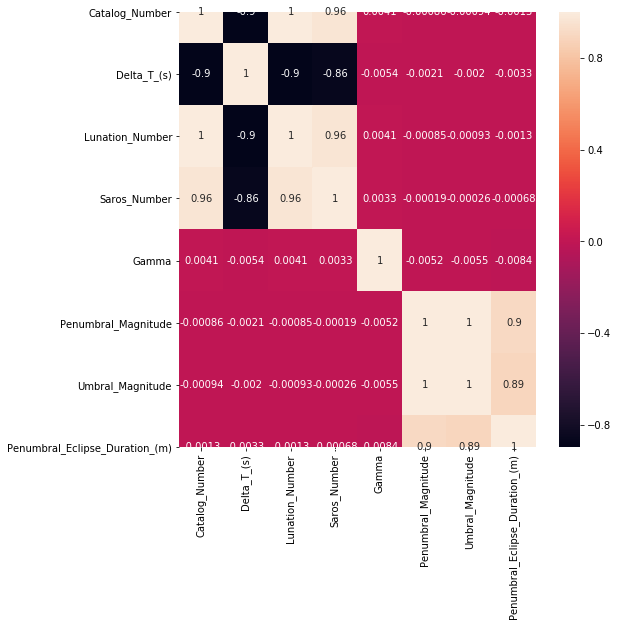

In [95]:
# set fig size to have better readibility of heatmap

fig, ax = plt.subplots(figsize=(8,8))
L_heatmap = sns.heatmap(L_corr_matrix, annot =True, ax=ax)
L_heatmap

([0, 1, 2], <a list of 3 Text xticklabel objects>)

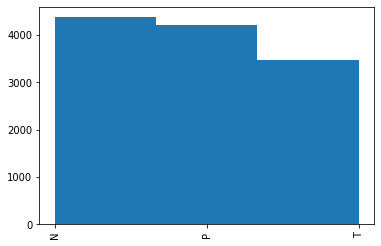

In [96]:
plt.hist(lunar["Eclipse_Type"], bins = len(lunar["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [101]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
date = solar['Calendar Date'].str[1:].str.split()
year, month, day = date.str[0], date.str[1], date.str[2]
timeline = [pd.datetime(year=y, month=m, day=d) for y, m, d in zip(year, month, day)]